# Business impact of discount

The SME division head proposed that we give a 20% discount to high propensity to churn customers. We can assume to start that everyone who is offered a discount will accept it.

# Workflow

Our task is to calculate the forecast revenue for the set of customers:

1. When no discount is offered
2. And when a discount is offered based on a probability cutoff to decide who should receive the 20% discount.


And hence to decide where the cut-off should be set in order to maximise revenue

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
test_data=pd.read_csv('C:\\Users\\ASUS\\OneDrive\\Desktop\\bcg\\predicted_data.csv')

In [43]:
test_data.drop(test_data.columns[0], axis=1, inplace=True)
test_data.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
0,5.705621,0.000000,4.715176,0.000000,0.0,2.166341,0.120372,0.103487,40.606701,0,...,False,False,True,False,False,False,False,True,1,0.568
1,6.000648,5.203623,5.050759,2.818932,0.0,1.312177,0.144902,0.000000,44.311378,1,...,False,False,False,True,False,False,True,False,0,0.215
2,0.000000,0.000000,0.000000,0.000000,0.0,2.125774,0.092453,0.086393,59.173468,0,...,True,False,False,False,False,False,True,False,0,0.005
3,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,0,...,False,False,True,False,False,False,False,True,0,0.106
4,3.201943,0.000000,2.484300,2.523109,0.0,1.238548,0.141434,0.000000,44.311378,0,...,False,False,True,False,False,False,False,True,0,0.220


# Calculating a baseline revenue estimate

Calculate a baseline estimate of the electricity revenue for every customer for the next twelve months based on the forecast consumption and forecast price and actual churn outcome. Call this basecase_revenue.

1.Determine Churn Period:

The churn period is between January 1, 2016, and February 29, 2016 (considering February as 29 days due to a leap year).

2.Calculate Churn Period Length:

The churn period covers 59 days (from January 1 to February 29).


3.Calculate Average Monthly Churn Rate:

To calculate the average monthly churn rate, divide the churn period length (59 days) by the total number of days in a month (approximately 30.44 days, considering an average month length over a year):
average_monthly_churn_rate = 59 days / 30.44 days ≈ 1.943


4.Calculate Revenue Loss Factor:

The revenue loss factor represents the average revenue loss for customers who churned during this period. It's based on the assumption that customers who churned experienced a full revenue loss for the months they were active and no revenue loss for the remaining months.


Calculate the revenue loss factor by taking into account the average monthly churn rate:

revenue_loss_factor = (1.0 * 1.943) + (0.0 * (12 - 1.943))

The above formula calculates the total revenue loss during the churn period by considering that churned customers had a revenue loss of 100% for the 1.943 months they were active and a revenue loss of 0% for the remaining (12 - 1.943) months in the year.


5.Calculate Reduction Factor:

The reduction factor is the complement of the revenue loss factor. It represents the percentage of revenue that is retained and can be calculated as:
reduction_factor = 1.0 - revenue_loss_factor.


6.Express Reduction Factor as a Decimal:

The reduction factor is now expressed as a percentage (e.g., 91.9%). To use it in calculations, convert it to a decimal:
reduction_factor_decimal = 0.919

So, the factor of 0.919 represents the average revenue reduction for customers who churned between January 1, 2016, and the start of March 2016, based on the assumption that they were active for approximately 1.943 months during that period.

In [44]:
test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m']) + 1) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']


test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn'])


For customers who end up churning, we should reduce our forecast revenue calculation by 91.9% to account for the customers churn some time between January 2016 and the start of March 2016. (Not knowing when they churn, a reasonable assumption for the lost revenue is the average of 100%, corresponding to churn on 1 January 2016, and 83.9%, corresponding to churn at the end of February, or 59 days into a 365 day year). Call this new variable basecase_revenue_after_churn, ie basecase_revenue_after_churn = basecase_revenue(1 -0.919 churn)

In [45]:
test_data.head(2)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
0,5.705621,0.000000,4.715176,0.000000,0.0,2.166341,0.120372,0.103487,40.606701,0,...,True,False,False,False,False,True,1,0.568,2.407085,0.194974
1,6.000648,5.203623,5.050759,2.818932,0.0,1.312177,0.144902,0.000000,44.311378,1,...,False,True,False,False,True,False,0,0.215,96.957640,96.957640


# Calculate the estimated benefits and costs of intervention

Now, pick a cut-off probability (eg 0.5) so that:

Customers with a higher churn probability than the cut-off get a discount, and
Customers below the churn-probability do not get a discount.
From this, calculate the revenue of the intervention scenario assuming:

All customers who are offered a discount accept it
Customers who do receive a discount are are assumed not to churn in the next twelve months (ie churn probability = 0), and therefore the retained
revenue is 0.8basecase_revenue , being (1-discount_fraction)basecase_revenue

Customers who do not receive a discount are assumed to churn based on the observed dependent variable (ie, a 1 or 0 for whether they actually

The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our task is to approximately find the optimal cut-off point. We may need to make additional assumptions. If we feel the assumptions above aren't justified and that others are better then we should modify our assumptions

In [46]:
def get_rev_delta(pred, cutoff=0.5, discount=0.2)-> float:
    """
    Get the total revenue change by offering discounts to customers with predicted churn risk >= cutoff
    """
    # Calculate discount revenue for all customers
    pred['discount_revenue'] = pred.apply(
        lambda row: row['basecase_revenue'] * (1 - discount) if row['churn_probability'] >= cutoff else row['basecase_revenue_after_churn'],
        axis=1
    )
    
    # Calculate revenue delta for each customer
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    
    # Calculate and return the sum of revenue deltas
    total_rev_delta = pred['revenue_delta'].sum()
    return total_rev_delta

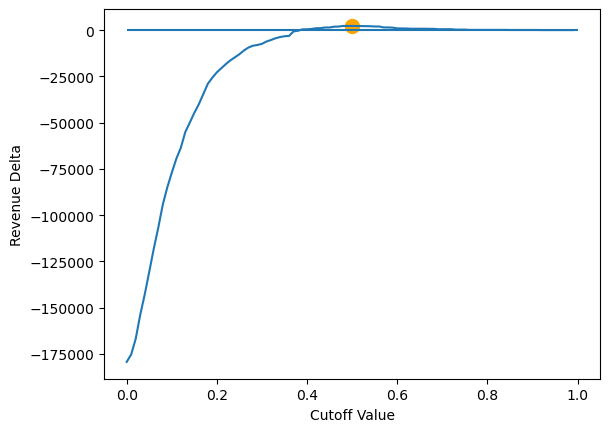

Maximum benefit at cutoff 0.50 with revenue delta of $2,271.40


In [47]:
def plot_tradeoff(test_data):
    rev_deltas = {}
    cutoff_values = np.arange(0, 1, 0.01)
    
    # Calculate revenue deltas for different cutoff values
    for cutoff in cutoff_values:
        rev_delta = get_rev_delta(test_data, cutoff=cutoff)
        rev_deltas[cutoff] = rev_delta
    
    # Convert results to a Pandas Series
    rev_deltas_series = pd.Series(rev_deltas)
    
    # Plot the revenue deltas
    rev_deltas_series.plot()
    
    # Mark the optimal point
    max_pred = rev_deltas_series.idxmax()
    plt.scatter(max_pred, rev_deltas_series[max_pred], s=100, c='orange')
    
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    
    plt.xlabel('Cutoff Value')
    plt.ylabel('Revenue Delta')
    
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred:.2f} with revenue delta of ${rev_deltas_series[max_pred]:,.2f}')

# Usage
plot_tradeoff(test_data)